## Assignment 2
Haider, Shabih, 21027325

In [93]:
import numpy as np
import pandas as pd
import wbgapi as wb
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# This function reads the data file and manipulates dataframe into our desired format
def world_bank_dfParser(df_file_name):
    df = pd.read_csv(df_file_name, index_col=[0,1])
    
    # Returning 2 Data Frames, One with years as columns, other with countries as columns
    return df, df.T   

In [221]:
# This function retrieves data from world bank website and saves it into a file
def get_world_bank_data(c_codes):
    # Indicator ids
    indicator_ids = ['EG.USE.PCAP.KG.OE', 'EN.ATM.METH.KT.CE', 'EN.ATM.GHGT.KT.CE']
    print(wb.series.info(indicator_ids))
    
    # Fetching data from World bank for listed countries and indicators
    wb_dataframe = wb.data.DataFrame(indicator_ids, country_codes, time=range(2010,2015)) # retrieving data for 2010 - 2015
    
    # Renaming indicator Ids with actual names
    wb_dataframe = wb_dataframe.rename(index={
        'EG.USE.PCAP.KG.OE' : 'Energy use', 
        'EN.ATM.METH.KT.CE' : 'Methane emissions', 
        'EN.ATM.GHGT.KT.CE' : 'Total greenhouse gas emissions'
    })
    
    # Renaming country and indicator column names
    wb_dataframe.index.rename(['Country', 'Indicators'], inplace=True)
    
    # Checking for null values in dataframe
    display(wb_dataframe.isnull().sum())
    
    # Writing received data to csv file
    print('Writing data to csv file.......')
    wb_dataframe.to_csv('wb_dataframe.csv', index=True)
    print('Done')
    


In [263]:
# Selected countries
country_codes = ['CHN', 'FRA', 'DEU', 'IND', 'USA', 'WLD']
country_names = {
    "CHN" : "China",
    "FRA" : "France",
    "DEU" : "Germany",
    "IND" : "India",
    "USA" : "United States",
    "WLD" : "World"
}

# This following function is used to fetch the data from WB API. Only call this function if you want to update the data.
get_world_bank_data(country_codes)

df_1, df_2 = world_bank_dfParser('wb_dataframe.csv')

id                 value
-----------------  -----------------------------------------------------
EG.USE.PCAP.KG.OE  Energy use (kg of oil equivalent per capita)
EN.ATM.METH.KT.CE  Methane emissions (kt of CO2 equivalent)
EN.ATM.GHGT.KT.CE  Total greenhouse gas emissions (kt of CO2 equivalent)
                   3 elements


YR2010    0
YR2011    0
YR2012    0
YR2013    0
YR2014    0
dtype: int64

Writing data to csv file.......
Done


In [264]:
# Some statistical information about the data. Statistical analysis is performed on all years.
df_2.groupby(['Country', 'Indicators'], axis = 1).describe()

count          mean           std  \
Country Indicators                                                          
CHN     Energy use                        5.0  2.123601e+03  1.087821e+02   
        Total greenhouse gas emissions    5.0  1.127961e+07  6.869141e+05   
        Methane emissions                 5.0  1.141070e+06  5.677093e+04   
DEU     Energy use                        5.0  3.892567e+03  8.167410e+01   
        Total greenhouse gas emissions    5.0  8.656200e+05  1.757072e+04   
        Methane emissions                 5.0  5.866000e+04  1.033755e+03   
FRA     Energy use                        5.0  3.838640e+03  1.265881e+02   
        Total greenhouse gas emissions    5.0  4.524000e+05  1.715740e+04   
        Methane emissions                 5.0  6.353600e+04  1.570694e+03   
IND     Energy use                        5.0  5.962339e+02  2.852880e+01   
        Total greenhouse gas emissions    5.0  2.794820e+06  1.870530e+05   
        Methane emissions                 5.0  6.522680e+05  1.822531e+03   
USA     Energy use                        5.0  6.985938e+03  1.148929e+02   
        Total greenhouse gas emissions    5.0  6.172692e+06  1.747729e+05   
        Methane emissions                 5.0  6.270800e+05  1.339614e+04   
WLD     Energy use                        5.0  1.892388e+03  1.731195e+01   
        Total greenhouse gas emissions    5.0  4.341875e+07  1.054904e+06   
        Methane emissions                 5.0  7.843902e+06  9.457410e+04   

                                                 min           25%  \
Country Indicators                                                   
CHN     Energy use                      1.954723e+03  2.085083e+03   
        Total greenhouse gas emissions  1.020382e+07  1.107455e+07   
        Methane emissions               1.063830e+06  1.106190e+06   
DEU     Energy use                      3.779462e+03  3.869816e+03   
        Total greenhouse gas emissions  8.436600e+05  8.525500e+05   
        Methane emissions               5.716000e+04  5.831000e+04   
FRA     Energy use                      3.659088e+03  3.833534e+03   
        Total greenhouse gas emissions  4.241300e+05  4.535100e+05   
        Methane emissions               6.186000e+04  6.273000e+04   
IND     Energy use                      5.616534e+02  5.779944e+02   
        Total greenhouse gas emissions  2.564130e+06  2.671200e+06   
        Methane emissions               6.501400e+05  6.504100e+05   
USA     Energy use                      6.872027e+03  6.905599e+03   
        Total greenhouse gas emissions  5.968740e+06  6.108670e+06   
        Methane emissions               6.181500e+05  6.184100e+05   
WLD     Energy use                      1.874658e+03  1.881478e+03   
        Total greenhouse gas emissions  4.181750e+07  4.302206e+07   
        Methane emissions               7.704390e+06  7.807040e+06   

                                                 50%           75%  \
Country Indicators                                                   
CHN     Energy use                      2.149603e+03  2.204243e+03   
        Total greenhouse gas emissions  1.139983e+07  1.185453e+07   
        Methane emissions               1.151100e+06  1.178020e+06   
DEU     Energy use                      3.876948e+03  3.939530e+03   
        Total greenhouse gas emissions  8.666700e+05  8.813000e+05   
        Methane emissions               5.869000e+04  5.922000e+04   
FRA     Energy use                      3.836656e+03  3.847072e+03   
        Total greenhouse gas emissions  4.563200e+05  4.572500e+05   
        Methane emissions               6.311000e+04  6.399000e+04   
IND     Energy use                      5.991556e+02  6.057940e+02   
        Total greenhouse gas emissions  2.814000e+06  2.875980e+06   
        Methane emissions               6.535300e+05  6.535900e+05   
USA     Energy use                      6.960684e+03  7.029955e+03   
        Total greenhouse gas emissions  6.129040

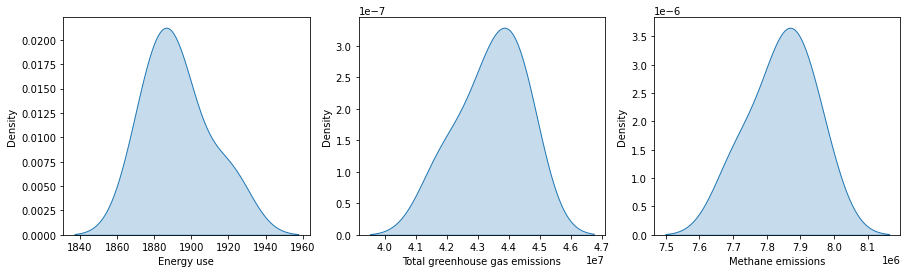

In [293]:
f, axes = plt.subplots(1, 3, figsize=(15,4))
sns.kdeplot(data=df_2['WLD'], shade=True, x='Energy use', ax=axes[0])
sns.kdeplot(data=df_2['WLD'], shade=True, x='Total greenhouse gas emissions', ax=axes[1])
sns.kdeplot(data=df_2['WLD'], shade=True, x='Methane emissions', ax=axes[2])
plt.savefig(f'kde_distribution.jpg')


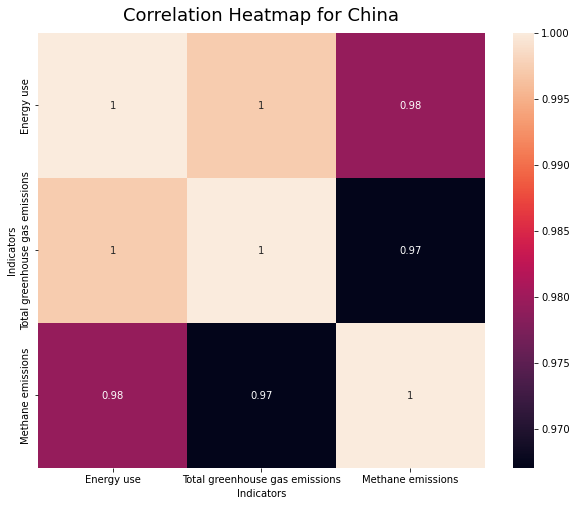

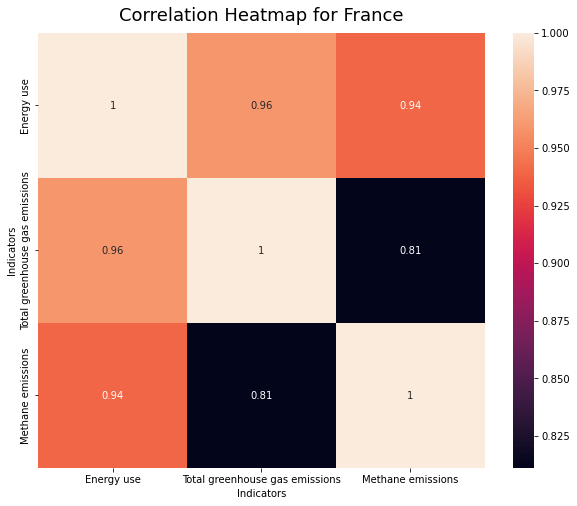

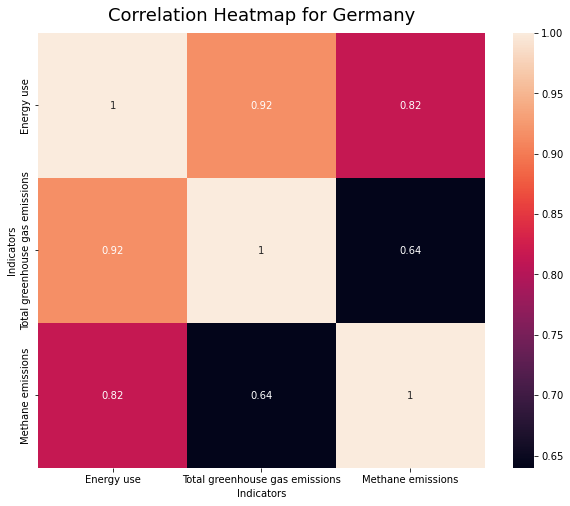

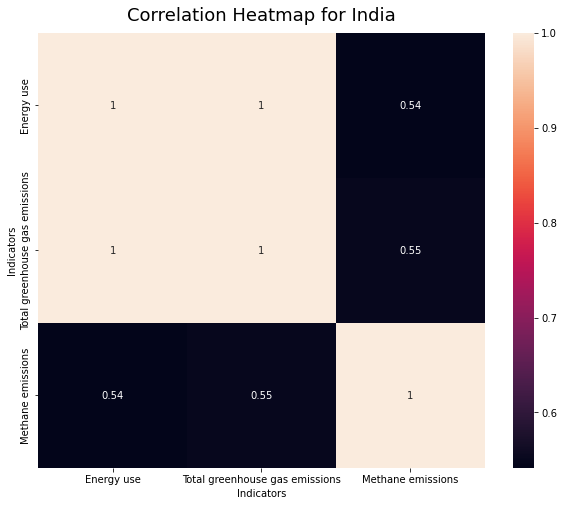

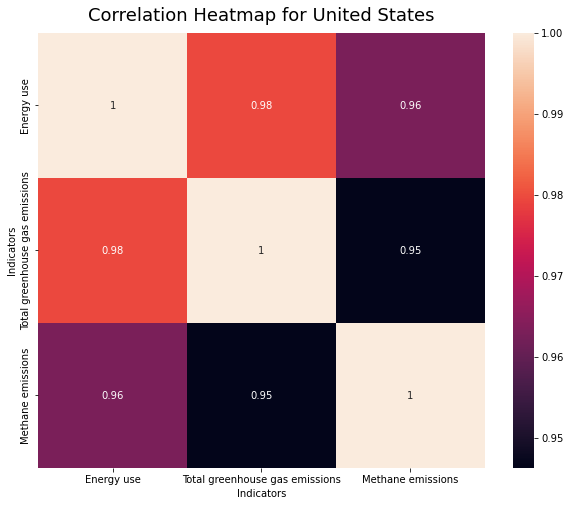

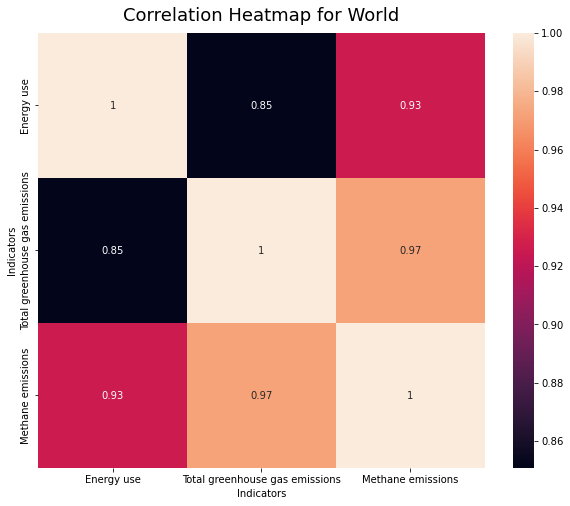

In [267]:
for code in country_codes:
    plt.figure(figsize=(10, 8))
    heatmap = sns.heatmap(df_2[code].corr(), annot=True)
    heatmap.set_title(f'Correlation Heatmap for {country_names.get(code)}', fontdict={'fontsize':18}, pad=12);
    plt.savefig(f'corr_heatmap_{country_names.get(code)}.jpg')


<Figure size 576x432 with 0 Axes>

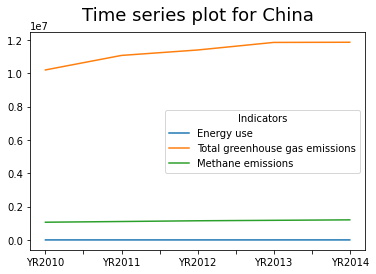

<Figure size 576x432 with 0 Axes>

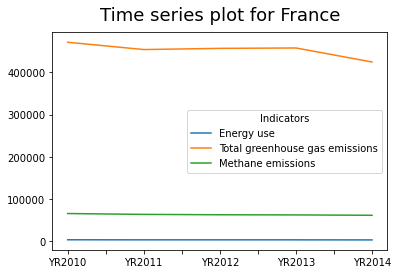

<Figure size 576x432 with 0 Axes>

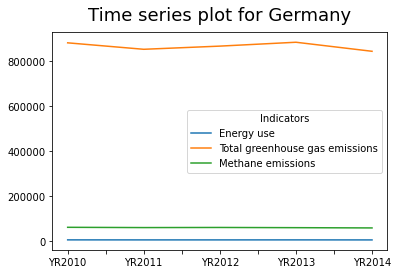

<Figure size 576x432 with 0 Axes>

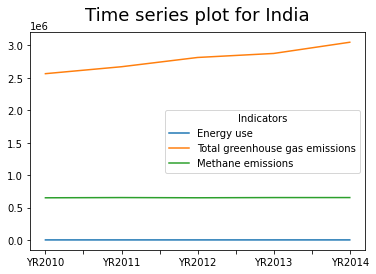

<Figure size 576x432 with 0 Axes>

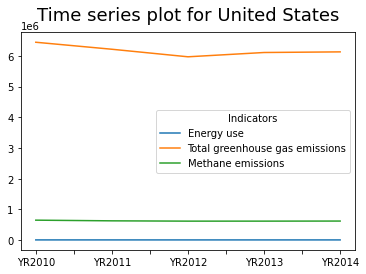

<Figure size 576x432 with 0 Axes>

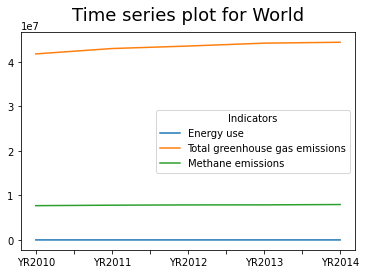

In [268]:
for code in country_codes:
    plt.figure(figsize=(8, 6))
    df_2[code].plot.line()
    plt.title(f'Time series plot for {country_names.get(code)}', fontdict={'fontsize':18}, pad=12)
    plt.savefig(f'line_plot_{country_names.get(code)}.jpg')
